In [10]:
from PIL import Image
import pandas as pd
import os
import hashlib
import matplotlib.pyplot as plt

In [11]:
# Define the paths for different categories of furniture
Lamps_Data = "Furniture_Data/lamps"
Beds_Data = "Furniture_Data/beds"
Chairs_Data = "Furniture_Data/chairs"
Dressers_Data = "Furniture_Data/dressers"
Sofas_Data = "Furniture_Data/sofas"
Tables_Data = "Furniture_Data/tables"

In [12]:
# Define the desired size for resizing images
desired_size = (256, 256)


In [16]:
# Function to load images from a directory and perform preprocessing
def load_and_preprocess_images(dataset_folder):
    image_data = []
    image_hashes = set()
    main_folder_name = os.path.basename(dataset_folder)
    for root, dirs, files in os.walk(dataset_folder):
        for filename in files:
            file_path = os.path.join(root, filename)
            try:
                # Skip non-image files
                if not (filename.endswith(('.jpg', '.jpeg', '.png'))):
                    continue
                
                img = Image.open(file_path)
                resized_img = img.resize(desired_size)
                image_hash = hashlib.md5(resized_img.tobytes()).hexdigest()
                
                if image_hash not in image_hashes:
                    image_hashes.add(image_hash)
                    subfolder_name = os.path.basename(root)
                    image_data.append((main_folder_name, subfolder_name, resized_img))
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")
    return image_data

In [17]:
# Load and preprocess images from each category
all_image_data = []
for category_data in [Lamps_Data, Beds_Data, Chairs_Data, Dressers_Data, Sofas_Data, Tables_Data]:
    category_images = load_and_preprocess_images(category_data)
    all_image_data.extend(category_images)


In [21]:
# Convert PIL Image to hashable format (pixel array)
df['Img_Hash'] = df['Img'].apply(lambda x: hashlib.md5(x.tobytes()).hexdigest())

# Display the number of images and unique hashes
print("Number of images:", len(df))
print("Number of unique images:", len(df['Img_Hash'].unique()))


Number of images: 85174
Number of unique images: 85163


In [22]:
df

,Cat,Style,Img,Img_Hash
0,lamps,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...,4c3dadb280324f673e939a61503a839e
1,lamps,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...,29bd42f9037ff9d757dd0c0a3622566f
2,lamps,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...,7adbdb812e9eca1689fe6cb1f88d6c26
3,lamps,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...,9a80530814557346260a4787f815aba9
4,lamps,Eclectic,<PIL.Image.Image image mode=RGB size=256x256 a...,b7cfeba31d4add2717a4c9726d28fa66
...,...,...,...,...
85169,tables,Asian,<PIL.Image.Image image mode=RGB size=256x256 a...,cbd5bee95fcf2747c87393e7aebab452
85170,tables,Asian,<PIL.Image.Image image mode=RGB size=256x256 a...,7865faa570fa14b9d6a722037aac0e35
85171,tables,Asian,<PIL.Image.Image image mode=RGB size=256x256 a...,051fa525df9a35138f80bd260806095e
85172,tables,Asian,<PIL.Image.Image image mode=RGB size=256x256 a...,94bf8db6d335d5b2e29ad699ff213961


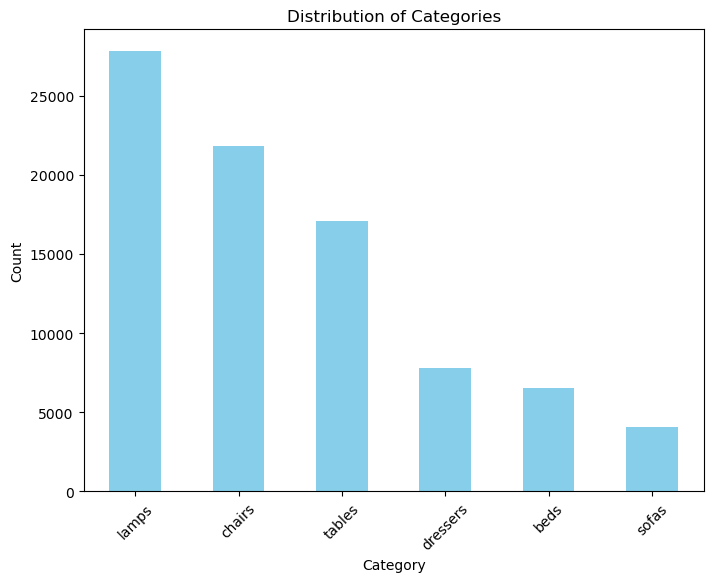

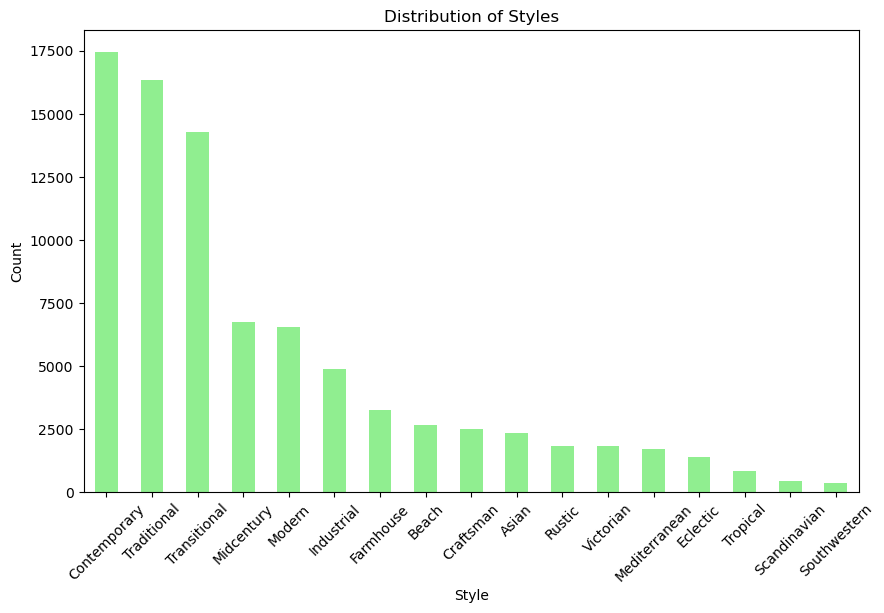

In [27]:
import matplotlib.pyplot as plt

# Explore distribution of categories
category_counts = df['Cat'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Explore distribution of styles
style_counts = df['Style'].value_counts()
plt.figure(figsize=(10, 6))
style_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Styles')
plt.xlabel('Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


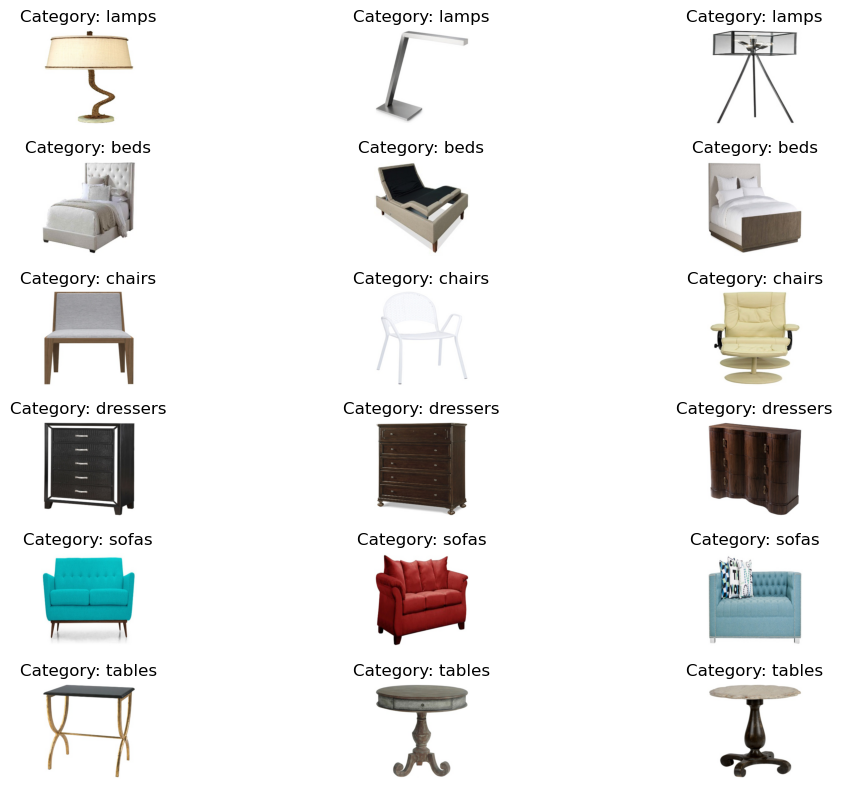

In [28]:
import numpy as np

# Function to display sample images
def display_sample_images(df, num_images_per_category=3):
    unique_categories = df['Cat'].unique()
    fig, axes = plt.subplots(len(unique_categories), num_images_per_category, figsize=(12, 8))

    for i, category in enumerate(unique_categories):
        category_images = df[df['Cat'] == category]['Img'].sample(num_images_per_category, random_state=42)
        for j, (image, ax) in enumerate(zip(category_images, axes[i])):
            ax.imshow(image)
            ax.set_title(f"Category: {category}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(df)
